(chapter:integrals)=

# Numerical integration in R

This chapter is a quick guide to numerical integration in R. Following the discussion you should understand how numerical integration works and be able to use R to compute numerically definite integrals of univariate functions.

:::{tip}
The discussion builds upon the material from chapters {ref}`chapter:plotting` and {ref}`chapter:functions` and assumes that you are able to work with user defined functions in R.
:::

The best way to work through the chapter is to read the discussion and then reproduce all code in your own R/RStudio installation. You can do this by copying code from a notebook cell to your R script and run the code line by line.

The chapter includes some exercises that allow you to test your understanding. It is recommended that you try these exercises on your own before choosing the option to reveal the solutions.

## Numerical integration - primer

Consider a function of one variable, $f(x)$, and its definite integral from $a$ to $b$ denoted

:::{math}
:label: def-int
\int_{a}^{b} f(x) dx
:::

which corresponds geometrically to the signed area between the graph of of the function and the horizontal axis.

### What is numerical integration?

We have seen that the analytical approach to evaluating {eq}`def-int` is to find an anti-derivative of $f$, say $F$, and then evaluate the integral as

:::{math}
\int_{a}^{b} f(x) dx = F(b) - F(a)
:::

By using the analytical approach we can find the exact value of  {eq}`def-int`. 

On the other hand numerical integration is the use of computational techniques for **approximately** evaluating {eq}`def-int` without needing to find anti-derivatives. Numerical integration is especially useful when we have to integrate functions who do not have closed-form anti-derivatives (or if we don't know the anti-derivative), but also in many cases where we are satisfied by using an approximate solution.

### How does numerical integration work?

We have seen in the lectures, that formally the definite integral 

:::{math}
\int_{a}^{b} f(x) dx
:::

can be defined as the limit of the sum of the areas of rectangles fitted *"just under"* (or *"just over"*) the graph of the function between $a$ and $b$ when the number of these rectangles converges to infinity (or equivalently when the *width* of a rectangle converges to zero).  

While numerical integration can be done in many different ways, in general it involves evaluating {eq}`def-int` by calculating the are of rectangles fitted *"just under"* (or *"just over"*) the graph of the function between $a$ and $b$ when the number of these rectangles is specified as a "sufficiently" large (but not infinite - computers can't deal with infinity). The idea of numerical integration therefore draws on the formal definition of integration above, but since the number of used rectangles cannot be infinite, it leads to an approximate, rather than exact solution. However, by varying the number of rectangles fitted we can control the absolute value of the numerical error. 

(section:integrals:byhand)=

## Numerical integration in R from first principles

While R has in-built functions for calculating definite integrals numerically to high precision (discussed in section {ref}`section:integrals:integrate`), we will start by conducting numerical integration "by hand" in the sense of only by using basic R functions and numerical methods. The purpose of this section is to illustrate the idea of numerical integration and build intuition about how the result of numerical integration functions should be understood and interpreted. 

We will do this for a specific function, and specific limits, but the same procedure can be applied to most basic functions with known functional form and any integration limits.

:::{note}
The following discussion includes some graphs which are produced in R. The code for producing the graphs is hidden as it is not central to the discussion, however, you can unhide it to see how to produce these graphs yourself. You should be familiar with most of the plotting functions used from the discussion in chapter {ref}`chapter:plotting` but the codes below also use some functionality from `graphics` not discussed before (in particular, the functions `polygon()` and `rect()`).  
:::

Consider the function 

$$
f(x) = x^2 + 1
$$

and suppose that we want to obtain the value of 

$$
\int_0^5 f(x) dx
$$

For context, note that this integral is easy to find analytically as follows. 
One anti-derivative of $f$ is $F(x)=\frac{1}{3}x^3+x$. Then 

$$
\int_0^5 f(x) dx = F(5)-F(0) = \left.\left[\frac{1}{3}x^3+x\right]\right|_0^5=140/3\approx46.666
$$

We can represent the value of the integral graphically as the value of the shaded area in the graph below

In [1]:
options(repr.plot.width=5, repr.plot.height=4, repr.plot.res=240)
options(jupyter.plot_mimetypes = "image/png") 

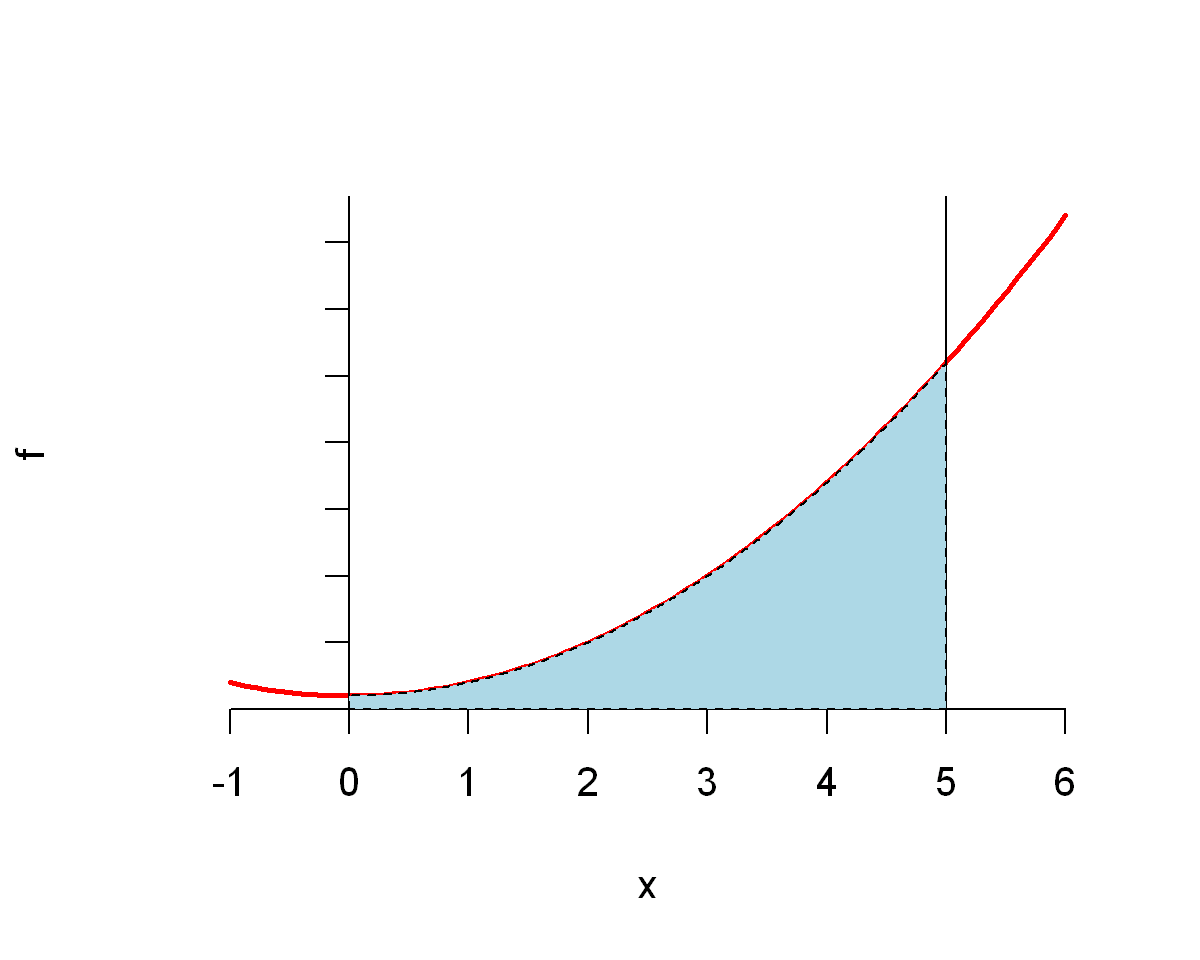

In [2]:
f <- function(x){x^2 + 1}

a <- 0
b <- 5

plot(f,from = -1, to = 6 , col="red", lwd=2, axes=FALSE)
axis(1, pos=0)
axis(2, pos=0, labels=FALSE, las=2)
abline(v=c(0,5))

xpol <- c(a,seq(a,b,by=0.01),b)
ypol <- c(0,f(seq(a,b,by=0.01)),0)
polygon(xpol,ypol, col="lightblue", lty="dashed")


Now let's start computing this definite integral numerically. 

Let's start by approximating the area under the graph of the function with the area of two rectangles of equal width just below the graph of the function, as in the graph below. 

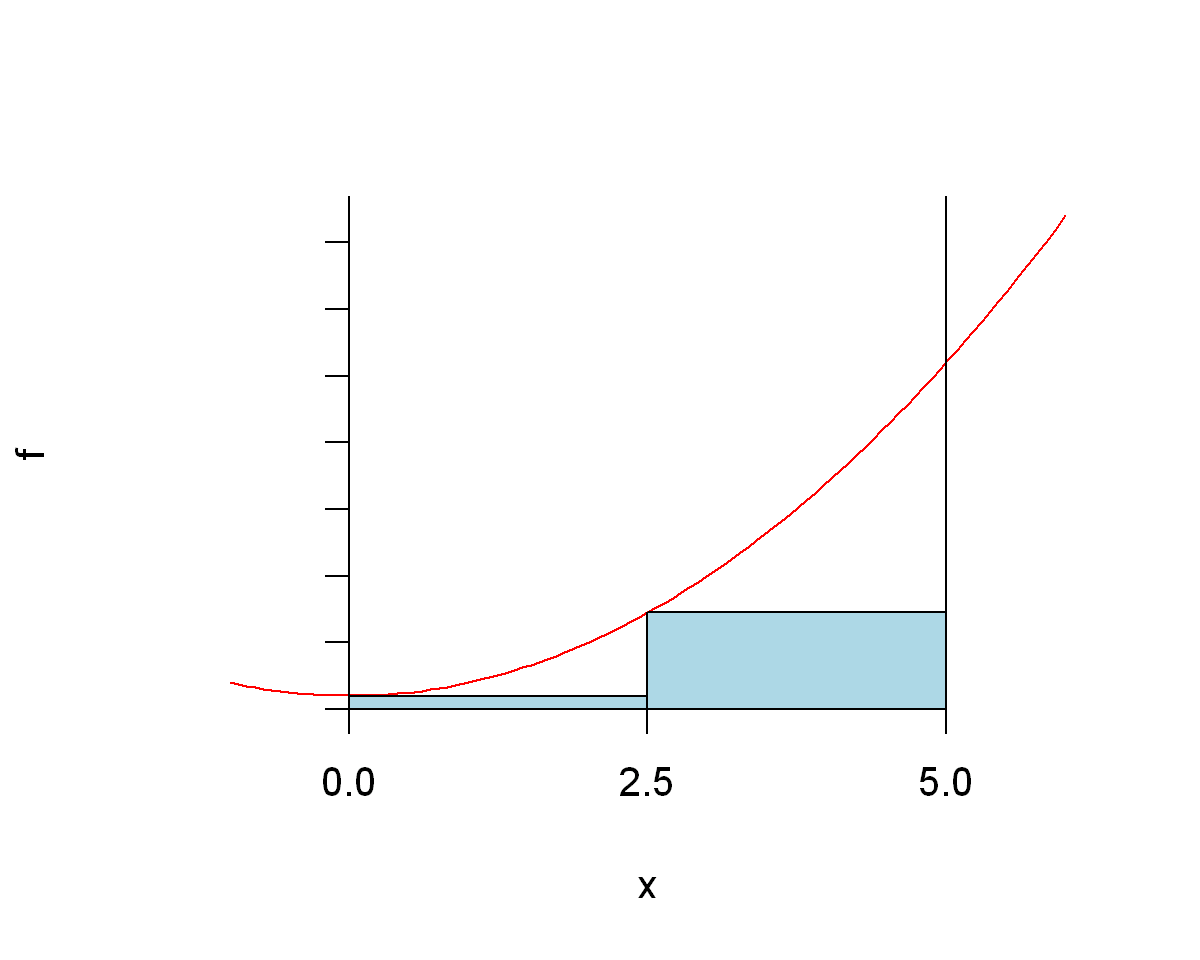

In [3]:
f <- function(x){x^2 + 1}

a <- 0
b <- 5

number_of_rectangles <- 2
  
xgrid <- seq(a, b, length.out=number_of_rectangles+1)
xs <- xgrid[1:number_of_rectangles]
ys <- f(xs)

plot(f,from = -1, to = 6 , col="red", axes=FALSE)
axis(1, pos=0, at=xgrid)
axis(2, pos=0, labels=FALSE, las=2)
abline(v=c(a,b))

xlefts <- xgrid[1:number_of_rectangles]
xrights <- xgrid[2:(number_of_rectangles+1)]
rect(xlefts, 0, xrights, ys, col="lightblue")

You may find that in the case of two rectangles you may find it is easier to do the below calculation by hand rather than by using a computer. However, the beauty of numerical methods is that once you do the code carefully, you can easily customize it to work in situations where doing it by hand will be much less efficient. In what follows we will write the code for computing the area of the two rectangles above which will be easy to customize to use any number of rectangles.

To find the area of these rectangles follow the steps below.

1. Define a function implementing `f(x)` 
2. (optionally) Define variables `a` and `b` storing the values of the lower and higher limits of integration.
3. (optionally) Define a variable, say `number_of_rectangles` storing the value of the number of rectangles used in the approximation.

In [4]:
f <- function(x){x^2 + 1}

a <- 0
b <- 5

number_of_rectangles <- 2

    Now we will need the widths and the heights of the rectangles. 

4. Proceed by creating a grid, say `xgrid`, of the horizontal endpoints of the rectangles. Since they are of equal width we can use the `seq()` function. Notice that the grid will have `number_of_rectangles+1` elements (for example, in the case of two rectangles the endpoints are 0, 2.5, and 5 as seen above)

In [5]:
xgrid <- seq(a, b, length.out=number_of_rectangles+1)
xgrid

[1] 0.0 2.5 5.0

5. Store the width of the rectangles in a variable, say `dx`. The width of each rectangle is simply the distance between `b` and `a` divided by the number of rectangles. For example,

In [6]:
dx <- (b-a)/number_of_rectangles
dx

[1] 2.5

    so the width of the rectangles when we use two rectangles is 2.5.

6. Now we need the height of the rectangles. In general, the height of each rectangle equals the value of the function `f` evaluated at the left endpoint of the rectangle. 

- Let a vector, say `xs`, store the left endpoints of the rectangles. This vector will consist of the first `number_of_rectangles` elements of `xgrid` above (we need to omit the final element of `xgrid` because no rectangle has it as a left endpoint).

In [7]:
xs <- xgrid[1:number_of_rectangles]
xs

[1] 0.0 2.5

so in the case of two rectangles, the left endpoints are 0 and 2.5.
    
- Next, evaluate the heights of the rectangles and store them in a vector, say `ys`. The heights of the rectangles are simply the value of the function `f` evaluated at the left endpoints of the rectangles (i.e. at `xs`)

In [8]:
ys <- f(xs)
ys

[1] 1.00 7.25

So in the case of two rectangles,

- the height of the first rectangle, `ys[1]`, is 1 ($f(0)=1$)

- the height of the second rectangle, `ys[2]`, is 7.25 ($f(2.5)=7.25$)
    

Finally the sum of the areas of the rectangles is simply 

$$
f(0)\Delta x + f(2.5)\Delta x = (f(0)+f(2.5)) \Delta x
$$

where $\Delta x$ is the width of the rectangle. 
    
In terms of the names of the variables we defined in R this is simply `(f(0)+f(2.5))*dx` 

- or alternatively `(ys[1]+ys[2])*dx` where `ys[i]` denotes the `i`'th element of the vector `ys`

- or even more conveniently `sum(ys)*dx`  (using the `sum()` function which returns the sum of all elements of a vector). This option is convenient because it works with the same syntax irrespective of the number of rectangles we have.

So the sum of areas of the rectangles, say `sum_areas`, is simply

In [9]:
sum_areas <- dx*sum(ys)
sum_areas

[1] 20.625

Now for clarity let's reproduce the whole code we needed for this calculation. Note that it's not a lot.

In [10]:
f <- function(x){x^2 + 1}

a <- 0
b <- 5

number_of_rectangles <- 2
xgrid <- seq(a, b, length.out=number_of_rectangles+1)
dx <- (b-a)/number_of_rectangles
xs <- xgrid[1:number_of_rectangles]
ys <- f(xs)
sum_areas <- dx*sum(ys)

sum_areas

[1] 20.625

Note that when we approximate the area with the area of two rectangles only we get 20.625 while the true value of the integral is 46.(6). The large approximation error is not surprising given the graph that we saw before - we are clearly omitting quite a bit of the area under the curve. 

To improve the approximation let's increase the number of rectangles to 5. Graphically, this would amount to approximating the area under the curve by the sum of areas of the five rectangles below.

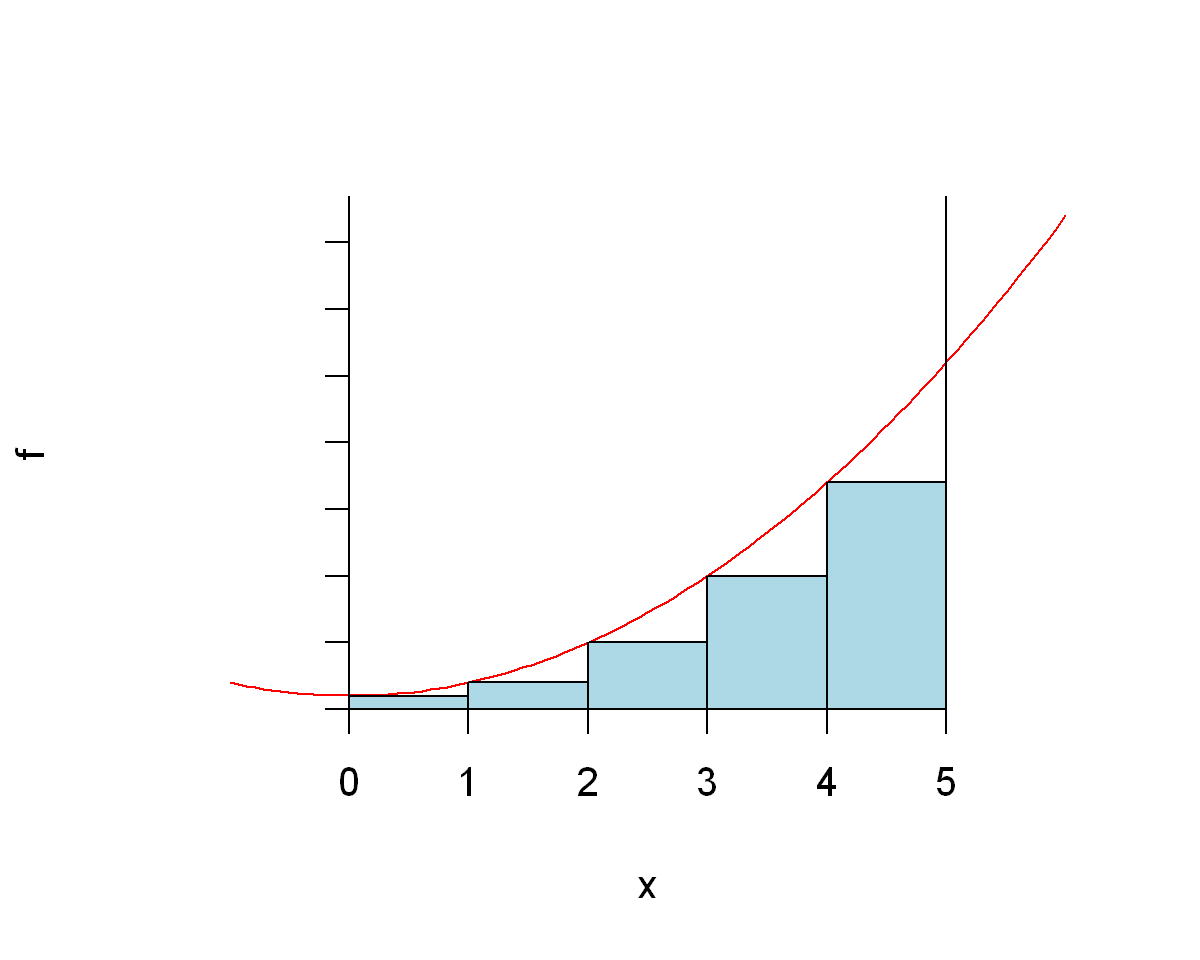

In [11]:
f <- function(x){x^2 + 1}

a <- 0
b <- 5

number_of_rectangles <- 5
  
xgrid <- seq(a, b, length.out=number_of_rectangles+1)
xs <- xgrid[1:number_of_rectangles]
ys <- f(xs)

plot(f,from = -1, to = 6 , col="red", axes=FALSE)
axis(1, pos=0, at=xgrid)
axis(2, pos=0, labels=FALSE, las=2)
abline(v=c(a,b))

xlefts <- xgrid[1:number_of_rectangles]
xrights <- xgrid[2:(number_of_rectangles+1)]
rect(xlefts, 0, xrights, ys, col="lightblue")

Now in order to calculate this area we can use exactly the same code as bofore but we need to set the number of rectangles to 5. 

In [12]:
f <- function(x){x^2 + 1}

a <- 0
b <- 5

number_of_rectangles <- 5
xgrid <- seq(a, b, length.out=number_of_rectangles+1)
dx <- (b-a)/number_of_rectangles
xs <- xgrid[1:number_of_rectangles]
ys <- f(xs)
sum_areas <- dx*sum(ys)

sum_areas

[1] 35

As we can see the approximation gets better (now the area is 35 rather than 20.625) but we are still far from the true value of 46.667. 

Note that at this stage it becomes clear that calculating the area of these rectangles by hand will take quite a while, while the R code we use does the calculation in miliseconds.

Let's take a big step and use 100 rectangles (if we were to do this by hand it might take weeks, but a computer excels at repetitive tasks).

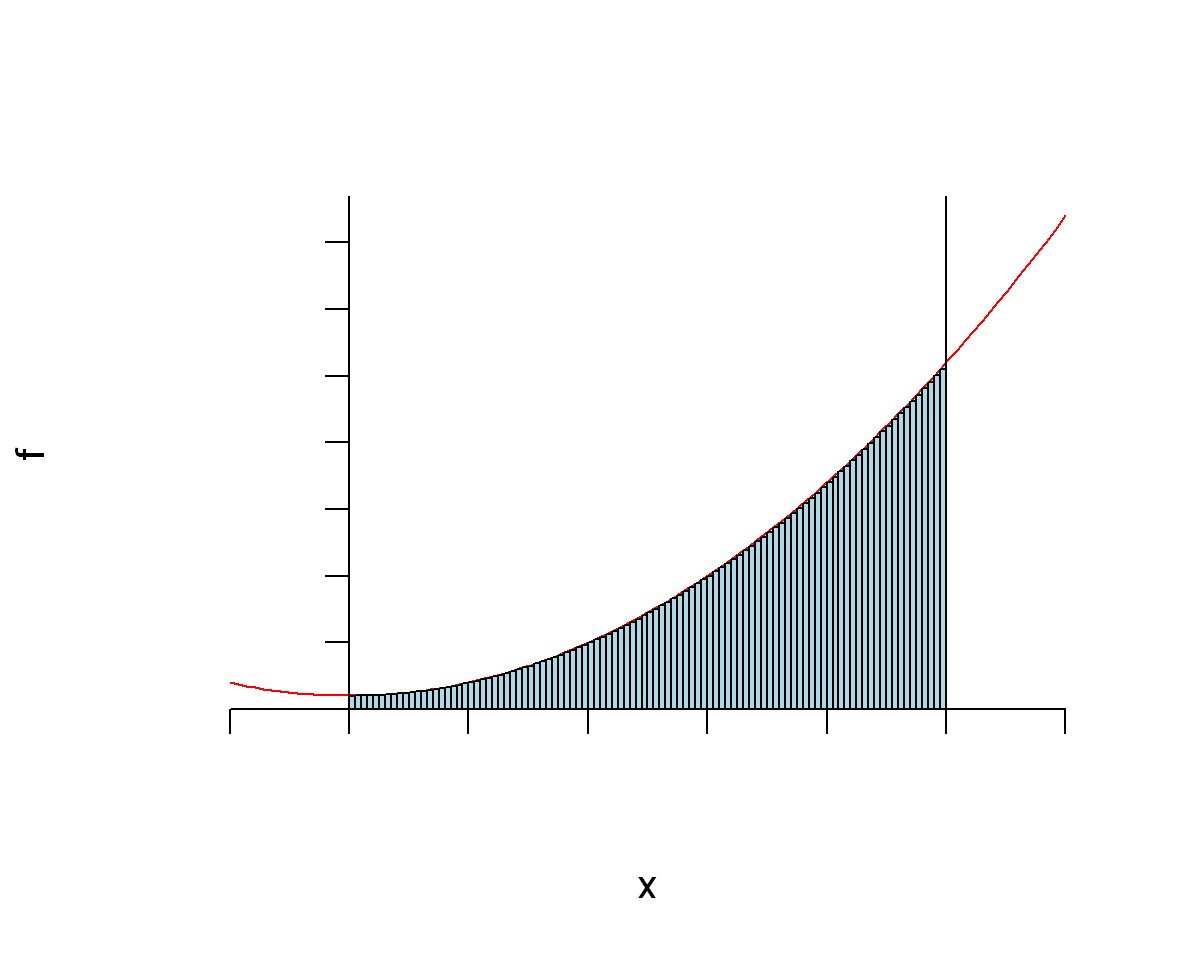

In [13]:
f <- function(x){x^2 + 1}

a <- 0
b <- 5

number_of_rectangles <- 100
  
xgrid <- seq(a, b, length.out=number_of_rectangles+1)
xs <- xgrid[1:number_of_rectangles]
ys <- f(xs)

plot(f,from = -1, to = 6 , col="red", axes=FALSE)
axis(1, pos=0, labels=FALSE)
axis(2, pos=0, labels=FALSE, las=2)
abline(v=c(a,b))

xlefts <- xgrid[1:number_of_rectangles]
xrights <- xgrid[2:(number_of_rectangles+1)]
rect(xlefts, 0, xrights, ys, col="lightblue")

Use exactly the same code but set `number_of_rectangles <- 100`

In [14]:
f <- function(x){x^2 + 1}

a <- 0
b <- 5

number_of_rectangles <- 100
xgrid <- seq(a, b, length.out=number_of_rectangles+1)
dx <- (b-a)/number_of_rectangles
xs <- xgrid[1:number_of_rectangles]
ys <- f(xs)
sum_areas <- dx*sum(ys)

sum_areas

[1] 46.04375

This is much better, with the approximation error less than 1.

And for 10000 rectangles

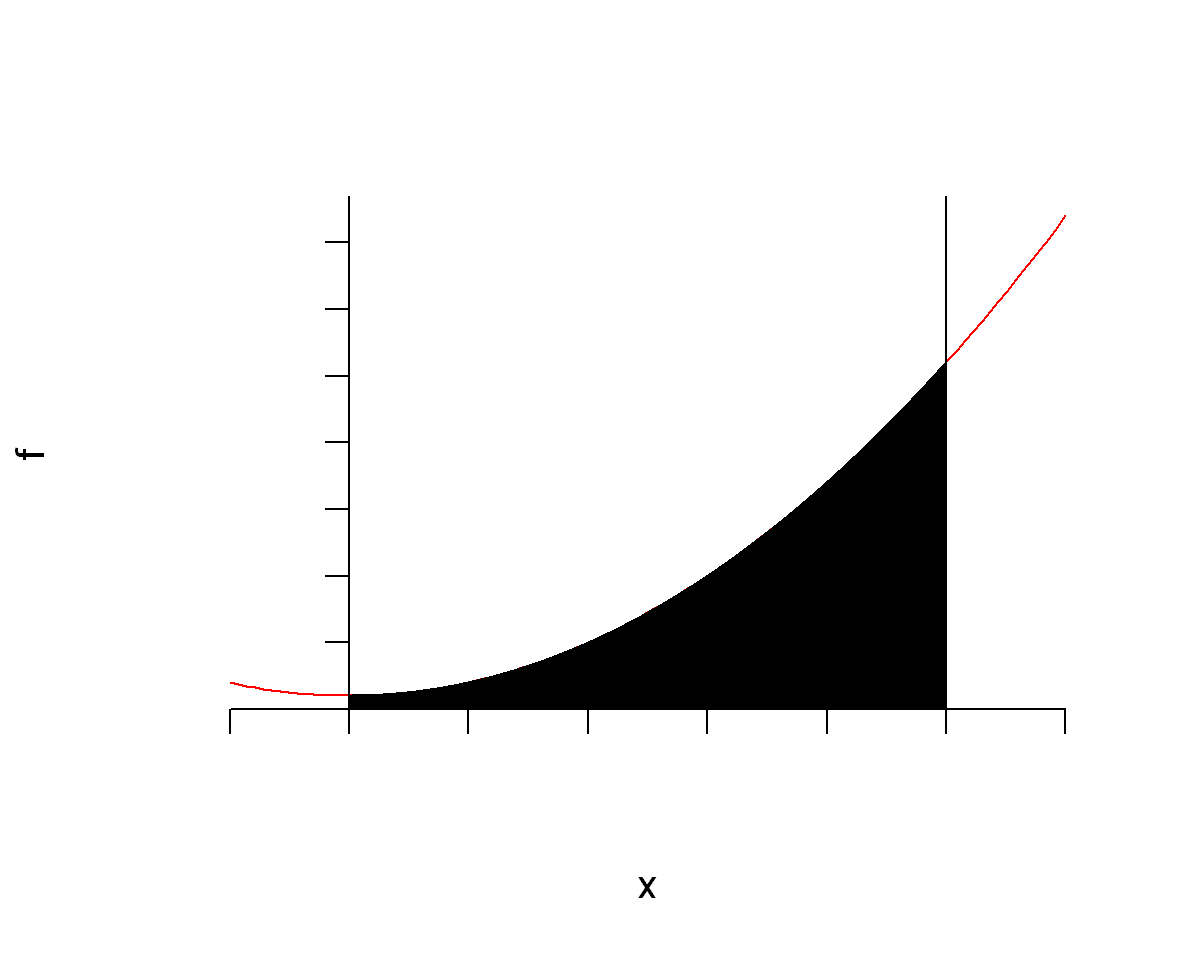

In [15]:
f <- function(x){x^2 + 1}

a <- 0
b <- 5

number_of_rectangles <- 10000
  
xgrid <- seq(a, b, length.out=number_of_rectangles+1)
xs <- xgrid[1:number_of_rectangles]
ys <- f(xs)

plot(f,from = -1, to = 6 , col="red", axes=FALSE)
axis(1, pos=0, labels=FALSE)
axis(2, pos=0, labels=FALSE, las=2)
abline(v=c(a,b))

xlefts <- xgrid[1:number_of_rectangles]
xrights <- xgrid[2:(number_of_rectangles+1)]
rect(xlefts, 0, xrights, ys, col="lightblue")

Set `number_of_rectangles <- 10000`

In [16]:
f <- function(x){x^2 + 1}

a <- 0
b <- 5

number_of_rectangles <- 10000
xgrid <- seq(a, b, length.out=number_of_rectangles+1)
dx <- (b-a)/number_of_rectangles
xs <- xgrid[1:number_of_rectangles]
ys <- f(xs)
sum_areas <- dx*sum(ys)

sum_areas

[1] 46.66042

And the numerical error is now only about 0.006.

This is the idea of numerical integration. There are different methods used to improve the accuracy beyond using more rectangles (e.g. using trapezoids rather than rectangles) but in all cases numerical integration works by approximating area under a curve by sums of areas of rectangles (or trapezoids, etc) and uses further methods to control the approximation error.

(section:integrals:integrate)=

## Numerical integration in R using `integrate()`

I hope that you found the discussion in {ref}`section:integrals:byhand` interesting and useful and now understand what numerical integration means and how it works, as well as you have an intuition about why it works and why is an approximate method. 

However, in reality we rarely implement numerical integration from first principles and can instead use in-built functions that implement numerical integration efficiently and with high accuracy.

The bottom line is that such a function in R is the function `integrate()` with usage

`integrate(f,a,b)` 

where
- `f` is the function to be integrated
- `a` is the lower limit of integration 
- `b` is the upper limit of integration

To use `integrate()` to compute the definite integral from before just set `f`, `a`, and `b`, as before

In [17]:
f <- function(x){x^2 + 1}

a <- 0
b <- 5

and call the function

In [18]:
integrate(f,a,b)

46.66667 with absolute error < 5.2e-13

As you can see it works very quickly, and produces a result with approximation error of the order 0.0000000000005, which is quite precise.

Using the `integrate()` function you are able to quickly evaluate definite integrals for any univariate function that you can define through an expression.

This completes the discussion of {ref}`chapter:integrals` as well as this set of notes on numerical methods. I hope that you have enjoyed it.

Thank you for reading and all the best!